In [15]:
# Dependencies
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn

# Twitter API Keys
consumer_key = 'YST9HNbbWc43mQw99jC9znWzg'
consumer_secret = 'hgJiYrs1gc1QT27XPfO3VrKnZ0mlpS2wBV0hPyOBtMbdl6liL4'
access_token = '93540451-zR2KMKnArzEmsuXgNvfguW9VyANz4H9jkAZBr5x9e'
access_token_secret = 'XJqWZeP2IJXXwsk27dyCrZRthKFHCKWtZ2PMBXprUuD5Y'

# Setup Tweepy API Authentication -2
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Accounts
twitter_user = ['@BBCNews', '@CBSNews', '@CNN', '@fox', '@nytimes']

In [16]:
#Set amount of tweets to retrieve
number_of_tweets = 100
#Set the DF to append
sentiment_analysis = pd.DataFrame()

for user in twitter_user :
    twitter_account = []
    positive_list = []
    neutral_list = []
    negative_list = []
    compound_list = []
    date_list = []
    counter_list = []
    a = []
    public_tweets = api.user_timeline(user, count=number_of_tweets)

    
    counter = 1
    for tweet in public_tweets:
        
        tweets = tweet["text"]
        
        #Sentiment Analysis
        twitter_account.append(tweet['user']['screen_name'])
        date_list.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        compound_list.append(analyzer.polarity_scores(tweets)["compound"])
        
        positive_list.append(analyzer.polarity_scores(tweets)["pos"])
        neutral_list.append(analyzer.polarity_scores(tweets)["neu"])
        negative_list.append(analyzer.polarity_scores(tweets)["neg"])
        
        counter_list.append(counter)
        counter=counter+1
        

    print("----------Data Summary for News Account----------")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(positive_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))

        
    
    news_df = pd.DataFrame({"Twitter Account": twitter_account,
                         "Positive": positive_list,
                         "Neutral": neutral_list,
                         "Negative": negative_list,
                         "compound": compound_list,
                         "Created Date": date_list,
                         "Tweets Ago":counter_list
                       })
    sentiment_analysis = sentiment_analysis.append(news_df)  
print('----------News Data Frame---------')    
#Save to CSV
sentiment_analysis.to_csv("sentiment_analysis.csv")


----------Data Summary for News Account----------
User: @BBCNews
Compound: 0.05362
Positive: 0.05362
Neutral: 0.82439
Negative: 0.12196
----------Data Summary for News Account----------
User: @CBSNews
Compound: 0.06179
Positive: 0.06179
Neutral: 0.88797
Negative: 0.05025
----------Data Summary for News Account----------
User: @CNN
Compound: 0.05642
Positive: 0.05642
Neutral: 0.87122
Negative: 0.07234
----------Data Summary for News Account----------
User: @fox
Compound: 0.1546
Positive: 0.1546
Neutral: 0.77538
Negative: 0.07001
----------Data Summary for News Account----------
User: @nytimes
Compound: 0.04655
Positive: 0.04655
Neutral: 0.88997
Negative: 0.06346
----------News Data Frame---------


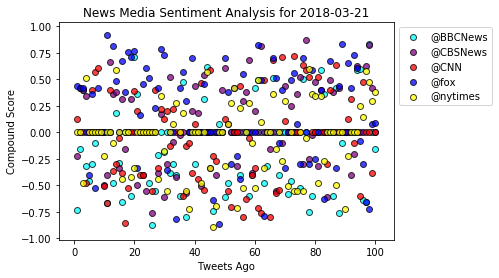

In [17]:
#Create first plot
tweets_ago=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='BBCNews','Tweets Ago']
bbcnews_plot=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='BBCNews','compound']
plt.scatter(tweets_ago, bbcnews_plot, marker="o", facecolors="cyan", edgecolors="black", alpha=0.75, label = '@BBCNews')
tweets_ago=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='CBSNews','Tweets Ago']
cbsnews_plot=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='CBSNews','compound']
plt.scatter(tweets_ago, cbsnews_plot, marker="o", facecolors="purple", edgecolors="black", alpha=0.75, label = '@CBSNews')
tweets_ago=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='CNN','Tweets Ago']
cnn_plot=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='CNN','compound']
plt.scatter(tweets_ago, cnn_plot, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label = '@CNN')
tweets_ago=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='fox','Tweets Ago']
foxnews_plot=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='fox','compound']
plt.scatter(tweets_ago, foxnews_plot, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label = '@fox')
tweets_ago=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='nytimes','Tweets Ago']
nytimes_plot=sentiment_analysis.loc[sentiment_analysis['Twitter Account']=='nytimes','compound']
plt.scatter(tweets_ago, nytimes_plot, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label = '@nytimes')
#Setting the legend and labels
legend =plt.legend()
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='small', color = 'black') 
lgd = plt.legend(bbox_to_anchor=(1, 1))

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]

plt.xlabel('Tweets Ago')
plt.ylabel('Compound Score')
plt.title('News Media Sentiment Analysis for 2018-03-21')
plt.savefig("news_sentiment.png")
plt.show()

In [18]:
#Create new Data frame for Overall plot
sentiment_analysis2 = sentiment_analysis.set_index("Twitter Account")

news_pd = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@fox":'',
                   "@nytimes":''}, index=[0])
news_pd.head()


bbc_public_tweets=sentiment_analysis2.loc['BBCNews',['compound','Tweets Ago']]
#bbc_public_tweets.head()
cbs_public_tweets=sentiment_analysis2.loc['CBSNews',['compound','Tweets Ago']]
#cbs_public_tweets.head()
cnn_public_tweets=sentiment_analysis2.loc['CNN',['compound','Tweets Ago']]
#cnn_public_tweets.head()
fox_public_tweets=sentiment_analysis2.loc['fox',['compound','Tweets Ago']]
#fox_public_tweets.head()
nyt_public_tweets=sentiment_analysis2.loc['nytimes',['compound','Tweets Ago']]
#nyt_public_tweets.head()

bbc_compound_mean = bbc_public_tweets['compound'].mean()
cbs_compound_mean = cbs_public_tweets['compound'].mean()
cnn_compound_mean = cnn_public_tweets['compound'].mean()
fox_compound_mean = fox_public_tweets['compound'].mean()
nyt_compound_mean = nyt_public_tweets['compound'].mean()

news_pd = pd.DataFrame({"@BBCNews":bbc_compound_mean,
                   "@CBSNews":cbs_compound_mean,
                   "@CNN":cnn_compound_mean,
                   "@fox":fox_compound_mean,
                   "@nytimes":nyt_compound_mean}, index=[0])
news_pd.head()

,@BBCNews,@CBSNews,@CNN,@fox,@nytimes
0,-0.116652,0.043237,-0.039755,0.165325,-0.05439


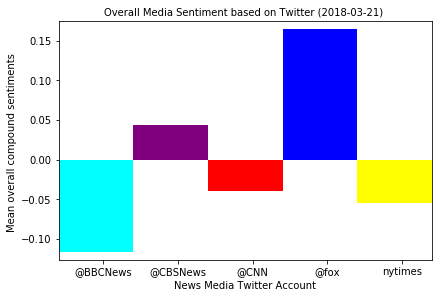

In [19]:
compound_mean_list = [bbc_compound_mean,cbs_compound_mean, cnn_compound_mean, fox_compound_mean, nyt_compound_mean]
x_axis = [0,1,2,3,4]

plt.bar(0, compound_mean_list[0], facecolor='cyan', alpha=1.0, align="center",width=1.0)
plt.bar(1, compound_mean_list[1], facecolor='purple', alpha=1.0, align="center",width=1.0)
plt.bar(2, compound_mean_list[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, compound_mean_list[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, compound_mean_list[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["@BBCNews","@CBSNews","@CNN", "@fox", "nytimes"], fontsize=10, color='black')

plt.xlim(-0.5, 4.5)
plt.ylim(min(compound_mean_list)-0.01, max(compound_mean_list)+0.01)

plt.title("Overall Media Sentiment based on Twitter (2018-03-21) ", fontsize=10, color='black')
plt.xlabel("News Media Twitter Account", fontsize=10, color='black')
plt.ylabel("Mean overall compound sentiments ", fontsize=10, color='black')
plt.tight_layout(pad=0.2, w_pad=0.05, h_pad=3.0)
plt.savefig("overall_sentiment.png")

plt.show()